In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt


In [29]:
# Define paths
data_dir = '/home/vmuser/2024/ACML/ASL'
# train_dir = 'ASL_train'
# test_dir = 'ASL_test'

split_ratio = 0.8  # 80% training, 20% testing

# data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio  # Use validation split
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),  # Resize images to a specific size (if needed)
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# test data generator without augmentation
test_datagen = ImageDataGenerator(validation_split=1 - split_ratio)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 725 images belonging to 29 classes.


Found 145 images belonging to 29 classes.


Displaying 2 images from class 'A':


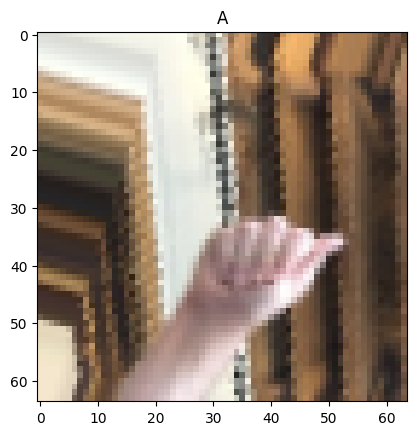

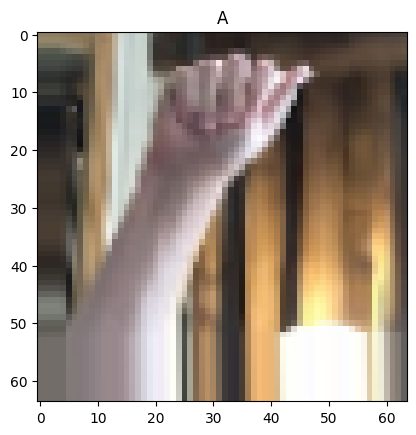

Displaying 2 images from class 'A':


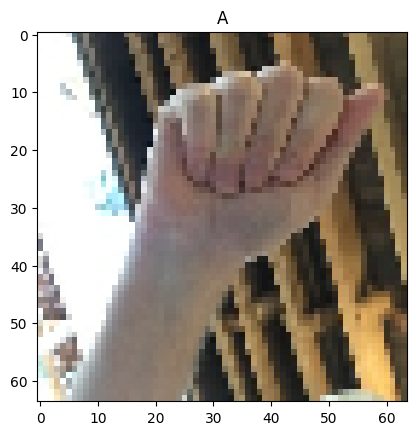

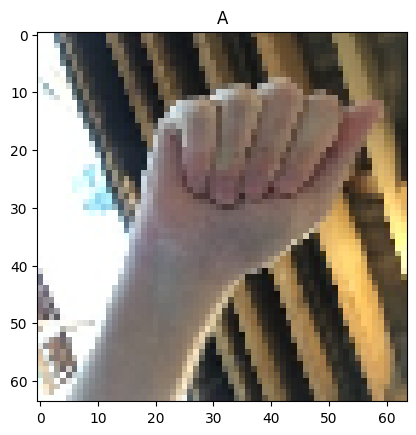

In [30]:
def display_images(generator, class_name, num_images=2):
    class_index = generator.class_indices[class_name]
    class_dir = os.path.join(data_dir, class_name)
    
    images = os.listdir(class_dir)
    
    print(f"Displaying {num_images} images from class '{class_name}':")
    count = 0
    for batch, labels in generator:
        for img, label in zip(batch, labels):
            if label[class_index] == 1:
                plt.imshow(img.astype('uint8'))
                plt.title(f'{class_name}')
                plt.show()
                count += 1
                if count >= num_images:
                    return

display_images(train_generator, 'A')
display_images(test_generator, 'A')

In [31]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(29, activation='softmax')
# ])

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
    
#     Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
    
#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Conv2D(256, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Flatten(),
#     Dense(512, activation='relu', kernel_regularizer='l2'),
#     Dropout(0.5),
#     Dense(512, activation='relu', kernel_regularizer='l2'),
#     Dropout(0.5),
#     Dense(29, activation='softmax')
# ])

model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

/home/vmuser/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467,933 (9.41 MB)

 Trainable params: 2,467,933 (9.41 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,  # Adjust the number of epochs as needed
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    ]
)

Epoch 1/30


/home/vmuser/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.0238 - loss: 39.1688 - val_accuracy: 0.0138 - val_loss: 3.3721 - learning_rate: 0.0010
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.0777 - loss: 3.3640 - val_accuracy: 0.0138 - val_loss: 3.3576 - learning_rate: 0.0010
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.0582 - loss: 3.3513 - val_accuracy: 0.0138 - val_loss: 3.3853 - learning_rate: 0.0010
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.0429 - loss: 3.3127 - val_accuracy: 0.0207 - val_loss: 3.4442 - learning_rate: 0.0010
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.0669 - loss: 3.2551 - val_accuracy: 0.0276 - val_loss: 3.3641 - learning_rate: 0.0010
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.0515 - loss: 3.3020 - val_accuracy: 0.0207 - val_loss: 3.4152 - learning_rate: 0.0010
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.0656 - loss: 3.2670 - val_accura

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4069 - loss: 2.7532
Validation Loss: 2.6303551197052
Validation Accuracy: 0.4275861978530884


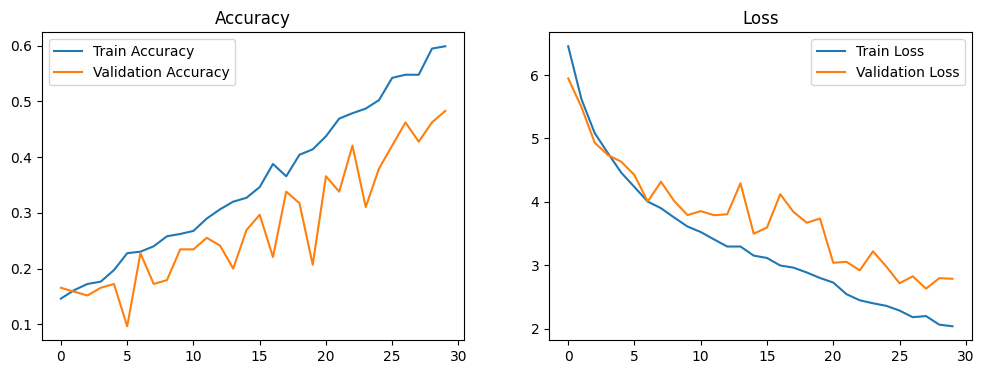

In [27]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(test_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plotting the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


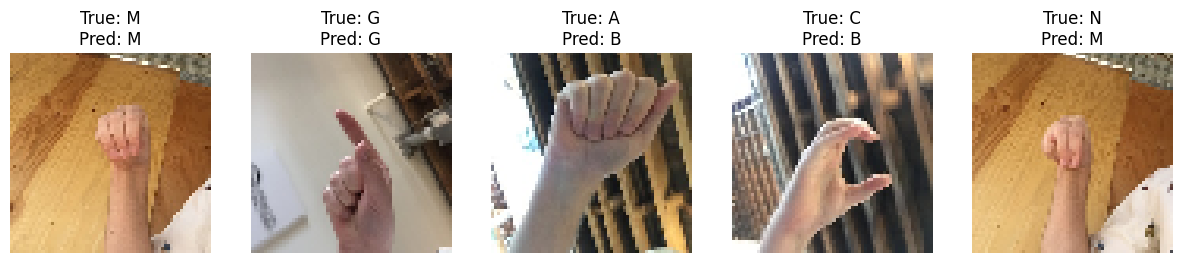

In [28]:
validation_images, validation_labels = next(test_generator)

# Make predictions on the validation images
predictions = model.predict(validation_images)

# Get the class indices
class_indices = {v: k for k, v in test_generator.class_indices.items()}

# Display a few validation images with their predicted labels
num_images_to_display = 5
plt.figure(figsize=(15, 10))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(validation_images[i].astype('uint8'))
    true_label = class_indices[np.argmax(validation_labels[i])]
    predicted_label = class_indices[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.show()